<a href="https://colab.research.google.com/github/brijesh486/pandas_numpy_viz/blob/main/Time_Series_Forecast(Exp_Smoothig)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing ,SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df= pd.read_csv('Air Passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df.shape

(144, 1)

In [4]:
df.head(),df.tail()

(            #Passengers
 Month                  
 1949-01-01          112
 1949-02-01          118
 1949-03-01          132
 1949-04-01          129
 1949-05-01          121,
             #Passengers
 Month                  
 1960-08-01          606
 1960-09-01          508
 1960-10-01          461
 1960-11-01          390
 1960-12-01          432)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


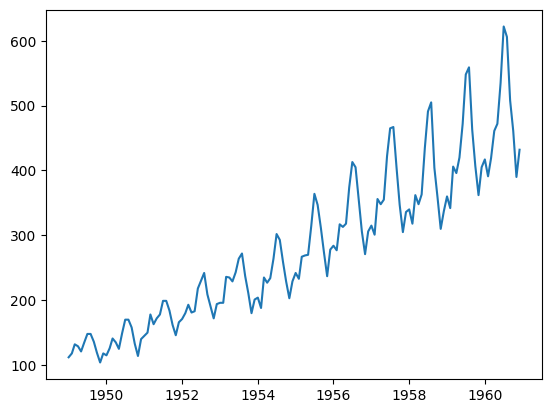

In [6]:
plt.plot(df)

In [7]:
result= seasonal_decompose(df['#Passengers'],model='multiplicative')

<Axes: xlabel='Month'>

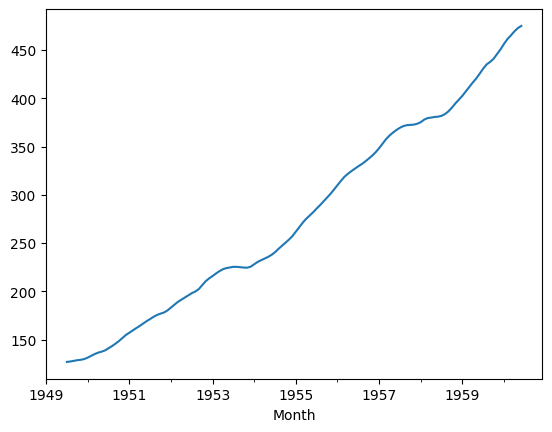

In [8]:
result.trend.plot()

<Axes: xlabel='Month'>

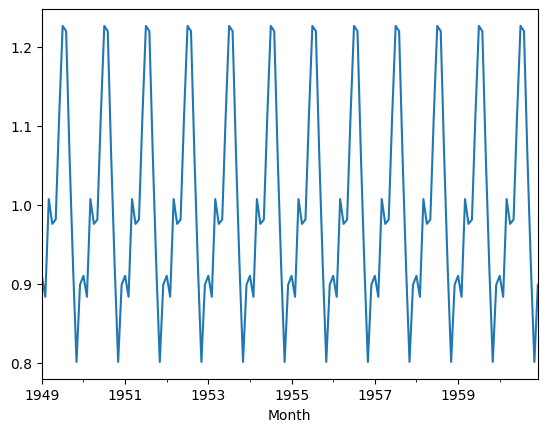

In [9]:
result.seasonal.plot()

<Axes: xlabel='Month'>

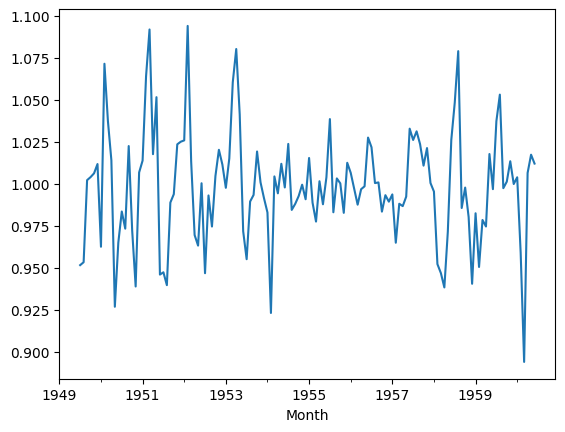

In [10]:
result.resid.plot()

#### Simple Exp Smoothing

In [11]:
simple=SimpleExpSmoothing(df['#Passengers']).fit(smoothing_level=0.5)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [12]:
sim_pred=simple.fittedvalues

In [13]:
sim_fore=simple.forecast(20)

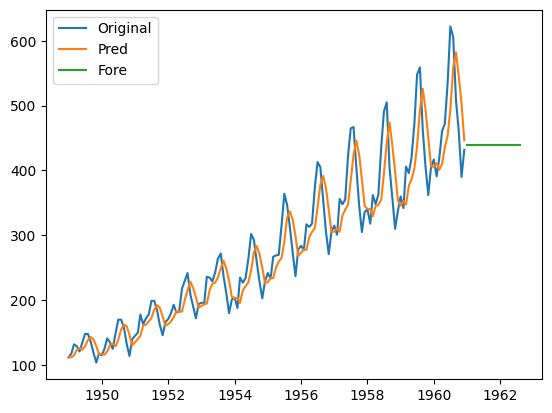

In [14]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(sim_pred,label='Pred')
plt.plot(sim_fore,label='Fore')
plt.legend()

#### Double Exp Smoothing

In [15]:
double= ExponentialSmoothing(df['#Passengers'],trend='multiplicative').fit(smoothing_level=0.6,
                                                                           smoothing_trend=0.7)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
doub_pred= double.fittedvalues

In [17]:
doub_fore= double.forecast(20)

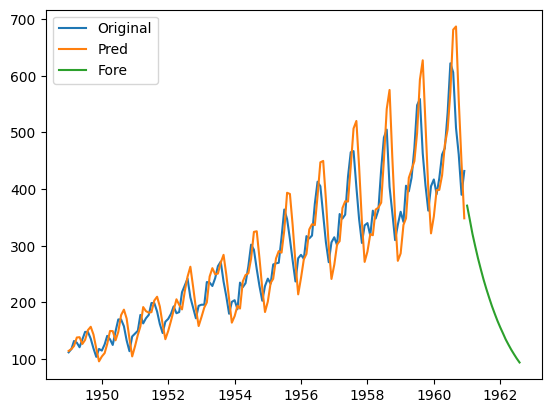

In [18]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(doub_pred,label='Pred')
plt.plot(doub_fore,label='Fore')
plt.legend()

#### Triple_Exp_Smoothing

In [19]:
triple= ExponentialSmoothing(df['#Passengers'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit(smoothing_level=0.6,
                                                                           smoothing_trend=0.5,smoothing_seasonal=0.5)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
trip_pred= triple.fittedvalues

In [21]:
trip_fore= triple.forecast(20)

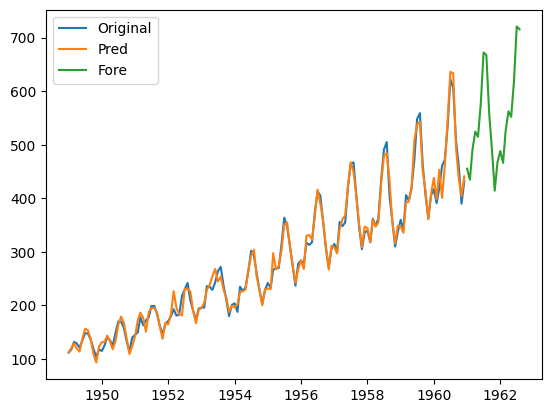

In [22]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(trip_pred,label='Pred')
plt.plot(trip_fore,label='Fore')
plt.legend()

In [23]:
#### Performance measures
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [24]:
### mean_absolute_error
sim_mae= round(mean_absolute_error(df['#Passengers'],sim_pred),2)
doub_mae= round(mean_absolute_error(df['#Passengers'],doub_pred),2)
trip_mae= round(mean_absolute_error(df['#Passengers'],trip_pred),2)
print(sim_mae,',',doub_mae,',',trip_mae)

30.85 , 34.71 , 9.4


In [25]:
### mean_squared_error
sim_mse= round(mean_squared_error(df['#Passengers'],sim_pred),2)
doub_mse= round(mean_squared_error(df['#Passengers'],doub_pred),2)
trip_mse= round(mean_squared_error(df['#Passengers'],trip_pred),2)
print(sim_mse,',',doub_mse,',',trip_mse)

1729.83 , 2185.96 , 168.69


In [26]:
### mean_absolute_percentage_error
sim_mape= round(mean_absolute_percentage_error(df['#Passengers'],sim_pred),2)*100
doub_mape= round(mean_absolute_percentage_error(df['#Passengers'],doub_pred),2)*100
trip_mape= round(mean_absolute_percentage_error(df['#Passengers'],trip_pred),2)*100
print(sim_mape,',',doub_mape,',',trip_mape)

10.0 , 12.0 , 4.0
